In [ ]:
pip install shap

In [ ]:
%matplotlib inline

import xgboost as xgb
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap


In [ ]:
pip install shap

# Data Set:
**Source**:

UCI Heart Disease has  three datasets on heart disease from hospitals of hungary, Longbeach and Cleveland. Dataset includes around 75 attributes of heart patient data.

**Creators**:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Donor**:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779





**Data Set Information:**

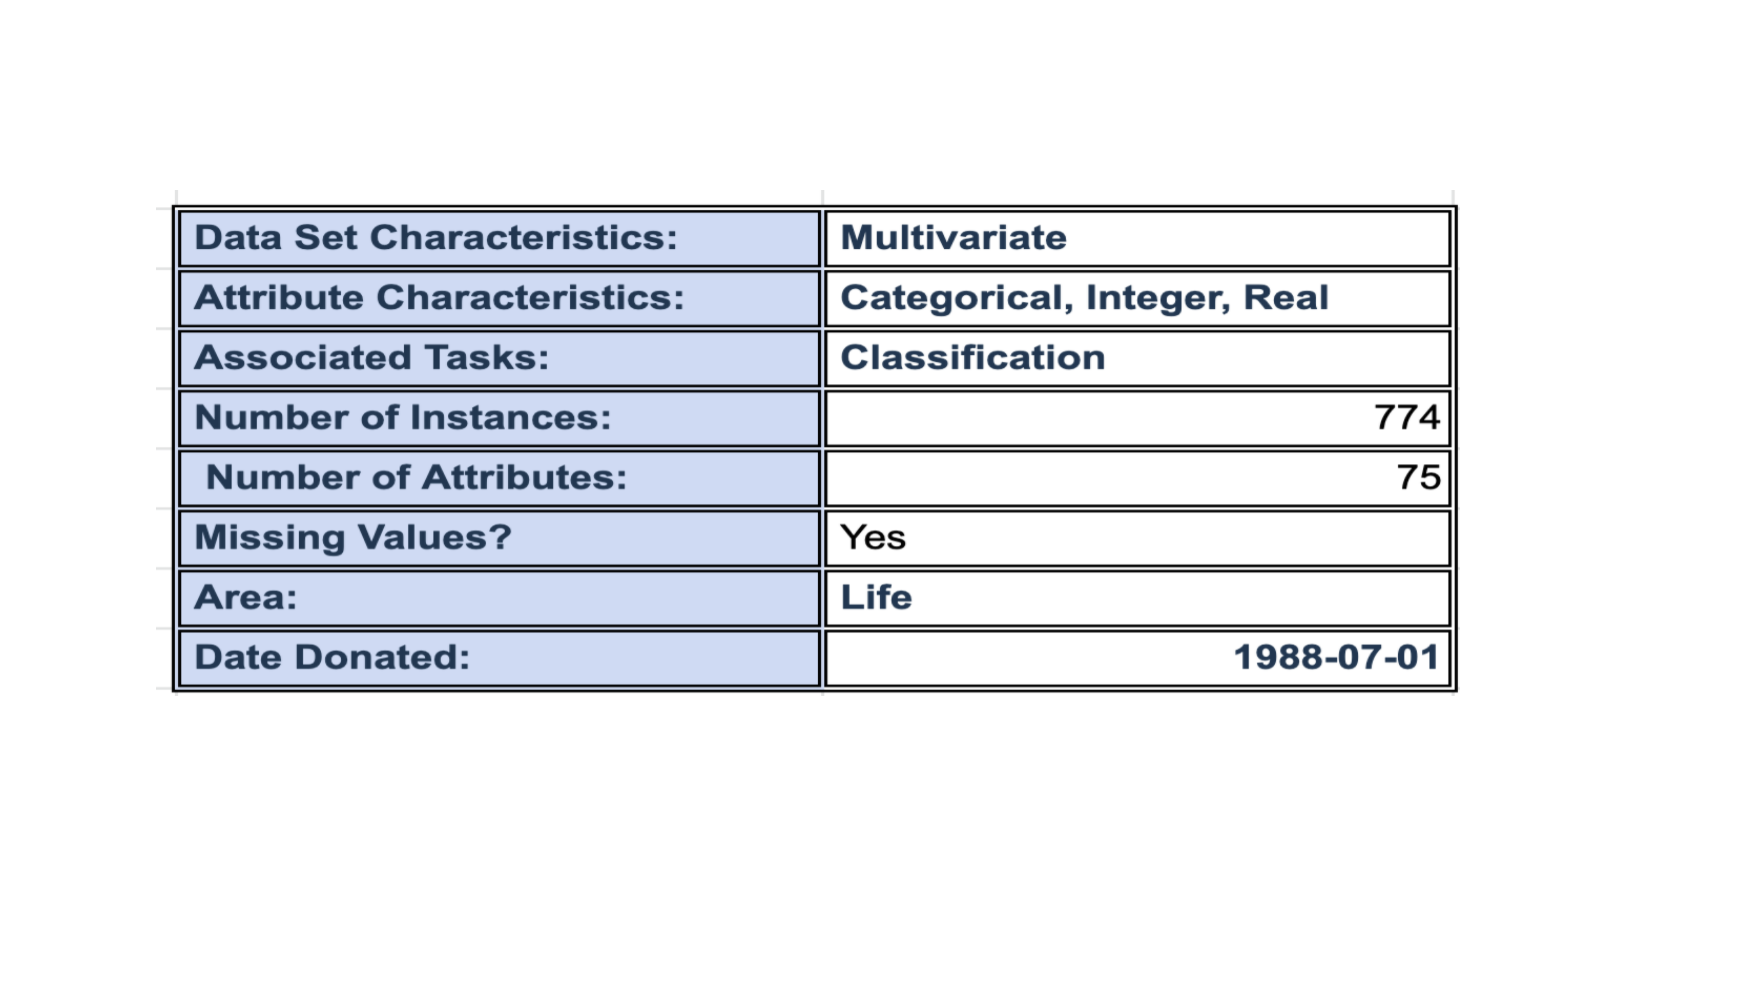


**Relevant Papers:**

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.


David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."


Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.



Data is not clean and has lot of missing values, unneccassary columns which cannot be used for prediction process. And mainly the data file is not in  csv format to load in to pandas dataframe . 


Data Loading steps:

1. Loading the data from url 
2. Reading in to csv by parsing the patient data which is spread over multiple rows.
3. Reading in to the pandas data frame for further processing



# **Data Set Attributes and Description**


      Number of Features:
      ====================
      1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
     20 ekgmo (month of exercise ECG reading)
     21 ekgday (day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion 
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease 
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used 

#  Data Collection

Heart data from three hosiptals cleveland, hungary and longbeach was in a raw format in a .data file. We are reading the file from the url of UCI website. And reading in to the python list to format in to 75 feature attributes. 

In [ ]:
import urllib
import re
#found on UCI database.
features = '''1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
     20 ekgmo (month of exercise ECG reading)
     21 ekgday (day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion 
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease 
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used '''
feature_cols = []
for line in features.split('\n'):
    feature_cols.append(line.strip().split()[1].strip(': '))
data1=io.TextIOWrapper(urllib.request.urlopen(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'),encoding='ISO-8859-1')
data2=io.TextIOWrapper(urllib.request.urlopen(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data'),encoding='ISO-8859-1')
data3=io.TextIOWrapper(urllib.request.urlopen(
     'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'),encoding='ISO-8859-1')
attr_list = []
temp_list = []
for file_ in (data1,data2,data3):
    for line in file_:
        quantities = re.split('[^0-9.name-]+',line.strip())
        for x in quantities:
            if x!='name':
                temp_list.append(x)
            else:
                attr_list.append(temp_list)
                temp_list=[]

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
%pwd


'/content'

In [ ]:
%cd /content/drive

[Errno 2] No such file or directory: '/content/drive'
/content


In [ ]:
#%ls

#%cd 'My Drive'/

%ls


sample_data/


Ideally each patient should have 75 attributes as per the attribute description given in UCI database but several patient rows had too many entries due to some inconsistencies, those rows must be removed before loading in to pandas dataframe to match the proper values to the appropriate attributes. 

In [ ]:


remove_error_rows = sorted([i for i,row in enumerate(attr_list) if len(row)!=75],reverse=True)
for i in remove_error_rows:
    del attr_list[i]
heart_data = pd.DataFrame(attr_list,columns=feature_cols)


Understanding the attributes and its datatypes before we dig deeper. All of the attributes are now read in to data fame as type object. It needs to be converted to datatypes as per the field description from the data creatord. It will be address in the data preprocessing steps.

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 75 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        774 non-null    object
 1   ccf       774 non-null    object
 2   age       774 non-null    object
 3   sex       774 non-null    object
 4   painloc   774 non-null    object
 5   painexer  774 non-null    object
 6   relrest   774 non-null    object
 7   pncaden   774 non-null    object
 8   cp        774 non-null    object
 9   trestbps  774 non-null    object
 10  htn       774 non-null    object
 11  chol      774 non-null    object
 12  smoke     774 non-null    object
 13  cigs      774 non-null    object
 14  years     774 non-null    object
 15  fbs       774 non-null    object
 16  dm        774 non-null    object
 17  famhist   774 non-null    object
 18  restecg   774 non-null    object
 19  ekgmo     774 non-null    object
 20  ekgday    774 non-null    object
 21  ekgyr     774 no

As per the results of below command,  all of the columns have 774 entries. But from the top values of the column its clear the some of the attributes has -9 value which are NaNs.


In [ ]:
heart_data.describe()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
count,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774
unique,590,1,49,2,3,3,3,1,4,58,3,214,3,26,43,3,3,3,4,13,32,8,3,4,3,3,3,14,87,45,29,111,73,74,51,58,33,3,3,43,5,32,142,6,1,1,25,5,3,3,7,5,3,2,13,31,11,5,5,3,3,3,3,3,3,3,3,3,2,5,8,9,7,69,54
top,29,0,54,1,1,-9,1,-9,4,120,0,0,-9,-9,-9,0,-9,-9,0,3,-9,86,0,0,0,0,0,1,9,-9,7,-9,-9,180,80,120,80,0,0,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,7,30,83,0,1,1,1,-9,1,-9,1,-9,1,1,1,1,1,1,1,-9,-9.
freq,2,774,48,596,454,282,315,774,386,115,391,49,568,307,310,629,687,300,452,78,53,143,684,546,536,624,630,324,65,417,106,54,55,81,124,115,224,445,704,319,290,348,65,488,774,774,746,744,772,769,425,716,756,773,81,50,164,395,461,384,409,557,377,566,404,571,359,426,772,766,741,674,691,306,373


In [ ]:
for column in heart_data.columns:
    try:
        heart_data[column]=heart_data[column].astype(int)
    except:
        heart_data[column]=heart_data[column].astype(float)
heart_data = heart_data.applymap(lambda x: np.NaN if x==-9 else x)
heart_data

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
0,1,0,63,1,NaN,NaN,NaN,NaN,1,145.0,1.0,233.0,NaN,50.0,20.0,1.0,NaN,1.0,2.0,2.0,3.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,10.5,6.0,13.0,150.0,60.0,190.0,90.0,145.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,2.0,16,81,0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,2,0,67,1,NaN,NaN,NaN,NaN,4,160.0,1.0,286.0,NaN,40.0,40.0,0.0,NaN,1.0,2.0,3.0,5.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0,9.5,6.0,13.0,108.0,64.0,160.0,90.0,160.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,5,81,2,1.0,2.0,2.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,3,0,67,1,NaN,NaN,NaN,NaN,4,120.0,1.0,229.0,NaN,20.0,35.0,0.0,NaN,1.0,2.0,2.0,19.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0,8.5,6.0,10.0,129.0,78.0,140.0,80.0,120.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,2.0,20,81,1,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,4,0,37,1,NaN,NaN,NaN,NaN,3,130.0,0.0,250.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,2.0,13.0,81.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,13.0,17.0,187.0,84.0,195.0,68.0,130.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,4,81,0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,6,0,41,0,NaN,NaN,NaN,NaN,2,130.0,1.0,204.0,NaN,0.0,0.0,0.0,NaN,1.0,2.0,2.0,7.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,NaN,9.0,172.0,71.0,160.0,74.0,130.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,18,81,0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,200,0,54,0,1.0,1.0,1.0,NaN,4,127.0,0.0,333.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,6.0,6.0,83.0,0.0,1.0,1.0,0.0,0.0,1.0,7.5,NaN,8.0,154.0,83.0,158.0,84.0,127.0,78.0,0.0,0.0,0.0,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,29,83,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.76,5.6
770,201,0,62,1,0.0,0.0,0.0,NaN,1,NaN,0.0,139.0,1.0,15.0,30.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,26,86,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.62,3.5
771,202,0,55,1,1.0,1.0,1.0,NaN,4,122.0,1.0,223.0,1.0,20.0,40.0,1.0,NaN,0.0,1.0,5.0,2.0,86.0,0.0,1.0,1.0,0.0,1.0,5.0,5.3,NaN,5.0,100.0,74.0,210.0,100.0,122.0,70.0,0.0,0.0,0.0,NaN,6.0,4.0,NaN,NaN,NaN,0.39,3.0,NaN,NaN,6.0,2.0,NaN,NaN,4.0,17,86,2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.69,5.6
772,116,0,58,1,1.0,1.0,1.0,NaN,4,NaN,0.0,385.0,0.0,10.0,20.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,16,83,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.81,6.0


# **Exploratory Data Analysis & Data Cleaning**

UCI Heart data set is multivariate which includes a range of attributes of different data types. It's very important to have an in-depth understanding of the data before using it in our model. So we are going to follow necessary EDA steps.



**Masking non-predictive features**

Several features like exercise reading, ID , exercise protocol should be removed since its not related to the predictability of the disease. The description of the columns on the UCI website also indicates that several of the columns should not be used so we are masking those attributes.

[In addition the information in columns 59+ is simply about the vessels that damage was detected in. Since we are only trying to predict the presence of heart disease and not the specific vessels which are damaged, I will discard these columns. ]

ID: id of patient ccf: social security number (I replaced this with a dummy value of 0) ekgmo (month of exercise ECG reading) ekgday (day of exercise ECG reading) ekgyr (year of exercise ECG reading) proto: exercise protocol dummy restckm irrelevant exerckm irrelevant thalsev: not used thalpul: not used earlobe: not used cmo: month of cardiac cath (sp?) (perhaps "call") cday: day of cardiac cath (sp?) cyr: year of cardiac cath (sp?)

In [ ]:
for feature in ['id','ccf','ekgday','ekgmo','ekgyr','proto','dummy','restckm','exerckm',
             'thalsev','thalpul','earlobe','cmo','cday','cyr']:
    del heart_data[feature]

In [ ]:
heart_data.shape

(774, 60)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 60 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       774 non-null    int64  
 1   sex       774 non-null    int64  
 2   painloc   492 non-null    float64
 3   painexer  492 non-null    float64
 4   relrest   488 non-null    float64
 5   pncaden   0 non-null      float64
 6   cp        774 non-null    int64  
 7   trestbps  717 non-null    float64
 8   htn       770 non-null    float64
 9   chol      744 non-null    float64
 10  smoke     206 non-null    float64
 11  cigs      467 non-null    float64
 12  years     464 non-null    float64
 13  fbs       759 non-null    float64
 14  dm        87 non-null     float64
 15  famhist   474 non-null    float64
 16  restecg   773 non-null    float64
 17  dig       711 non-null    float64
 18  prop      710 non-null    float64
 19  nitr      712 non-null    float64
 20  pro       712 non-null    float6

**Step 1: Maximize insight into a data set**

To understand the data better, we are using covariance matrix to understand the correlation between the variables.

In [ ]:
heart_part1 = heart_data[['age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp',
       'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm',
       'famhist', 'restecg', 'dig', 'num']]
heart_part2 =  heart_data[['prop', 'nitr', 'pro', 'diuretic',
       'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps',
       'tpeakbpd', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5',
       'rldv5e', 'ca','num']]
heart_part3 = heart_data[heart_data.columns[37:]]

In [ ]:
heart_part1 

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,dig,num
0,63,1,NaN,NaN,NaN,NaN,1,145.0,1.0,233.0,NaN,50.0,20.0,1.0,NaN,1.0,2.0,0.0,0
1,67,1,NaN,NaN,NaN,NaN,4,160.0,1.0,286.0,NaN,40.0,40.0,0.0,NaN,1.0,2.0,0.0,2
2,67,1,NaN,NaN,NaN,NaN,4,120.0,1.0,229.0,NaN,20.0,35.0,0.0,NaN,1.0,2.0,0.0,1
3,37,1,NaN,NaN,NaN,NaN,3,130.0,0.0,250.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0
4,41,0,NaN,NaN,NaN,NaN,2,130.0,1.0,204.0,NaN,0.0,0.0,0.0,NaN,1.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,54,0,1.0,1.0,1.0,NaN,4,127.0,0.0,333.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0,1
770,62,1,0.0,0.0,0.0,NaN,1,NaN,0.0,139.0,1.0,15.0,30.0,0.0,NaN,0.0,1.0,NaN,0
771,55,1,1.0,1.0,1.0,NaN,4,122.0,1.0,223.0,1.0,20.0,40.0,1.0,NaN,0.0,1.0,0.0,2
772,58,1,1.0,1.0,1.0,NaN,4,NaN,0.0,385.0,0.0,10.0,20.0,1.0,1.0,1.0,2.0,NaN,0


In [ ]:
heart_part2

,prop,nitr,pro,diuretic,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,num
0,0.0,0.0,0.0,0.0,10.5,6.0,13.0,150.0,60.0,190.0,90.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0.0,0
1,1.0,0.0,0.0,0.0,9.5,6.0,13.0,108.0,64.0,160.0,90.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,3.0,2
2,1.0,0.0,0.0,0.0,8.5,6.0,10.0,129.0,78.0,140.0,80.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,2.0,1
3,1.0,0.0,0.0,0.0,13.0,13.0,17.0,187.0,84.0,195.0,68.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0.0,0
4,0.0,0.0,0.0,0.0,7.0,NaN,9.0,172.0,71.0,160.0,74.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1.0,1.0,0.0,0.0,7.5,NaN,8.0,154.0,83.0,158.0,84.0,78.0,0.0,0.0,0.0,NaN,20.0,20.0,NaN,1
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
771,1.0,1.0,0.0,1.0,5.3,NaN,5.0,100.0,74.0,210.0,100.0,70.0,0.0,0.0,0.0,NaN,6.0,4.0,NaN,2
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


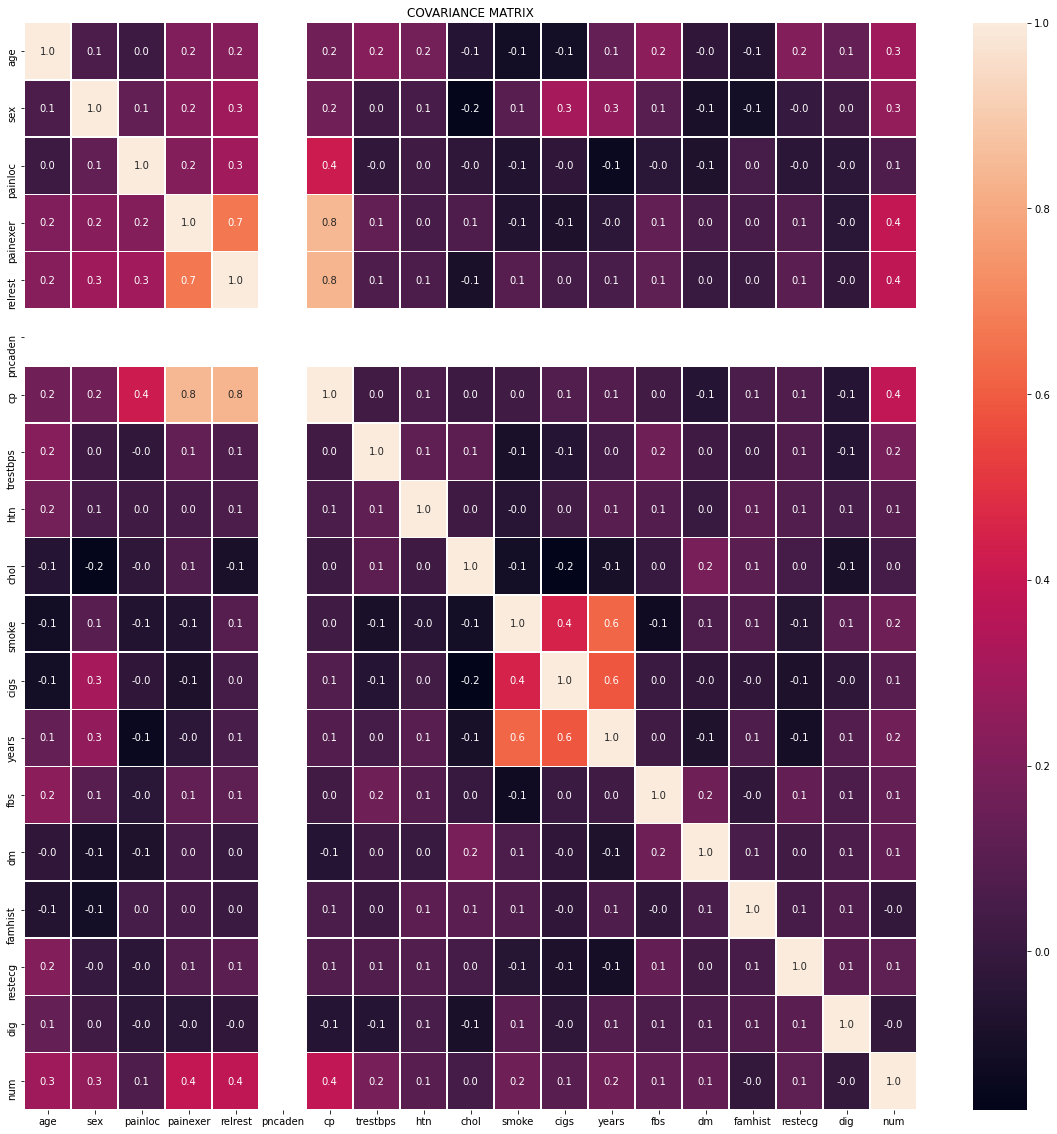

In [ ]:

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heart_part1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("COVARIANCE MATRIX")
plt.show()

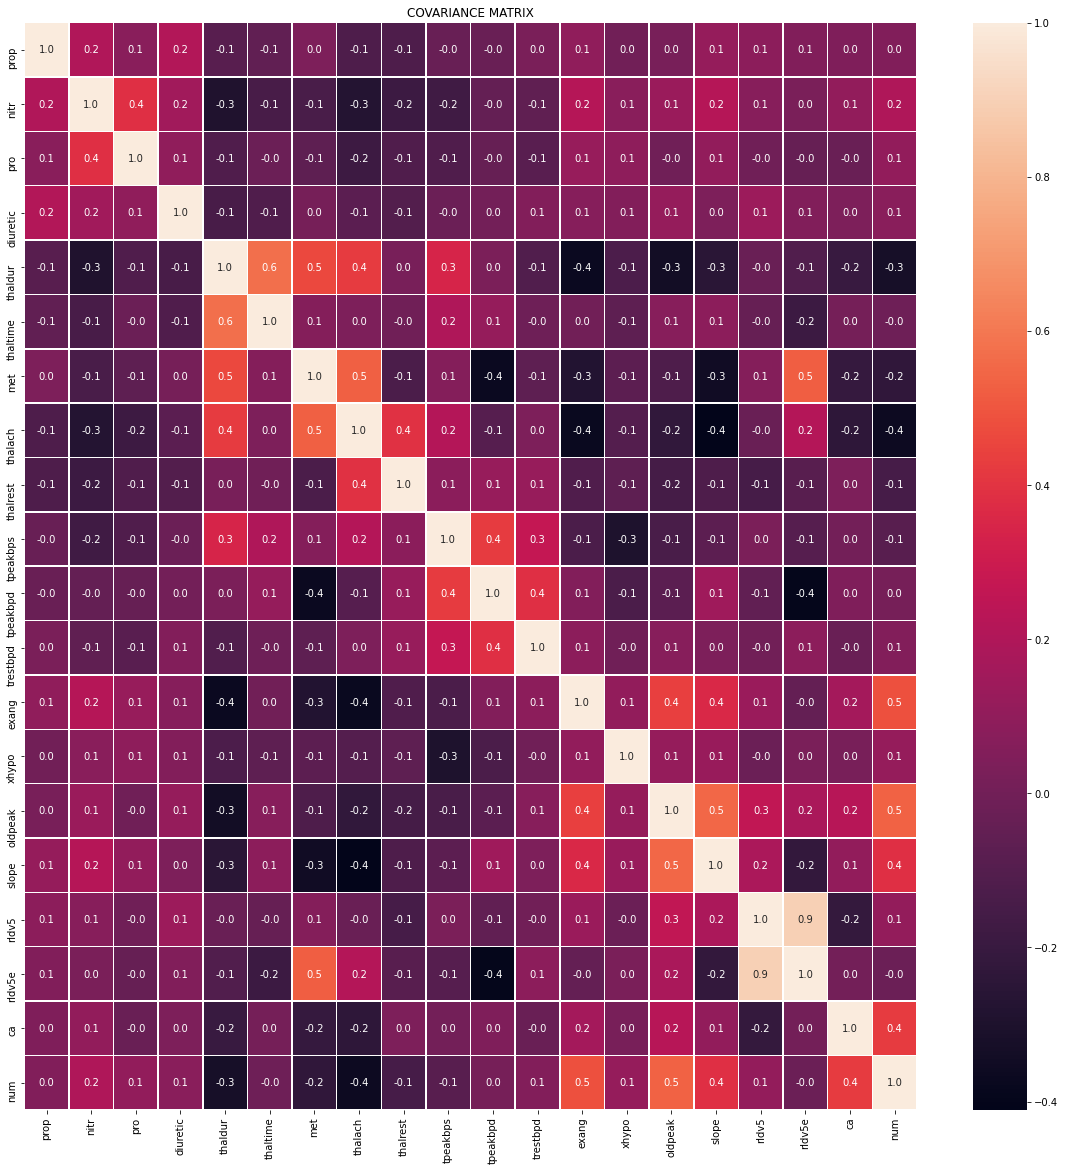

In [ ]:

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heart_part2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("COVARIANCE MATRIX")
plt.show()

In addition the information in columns 59+ is  about the vessels that damage was detected in. Since we are only trying to predict the presence of heart disease and not the specific vessels which are damaged, we can discard these columns.But before doing that its better to understand the correlation between the target variables for the columns. 

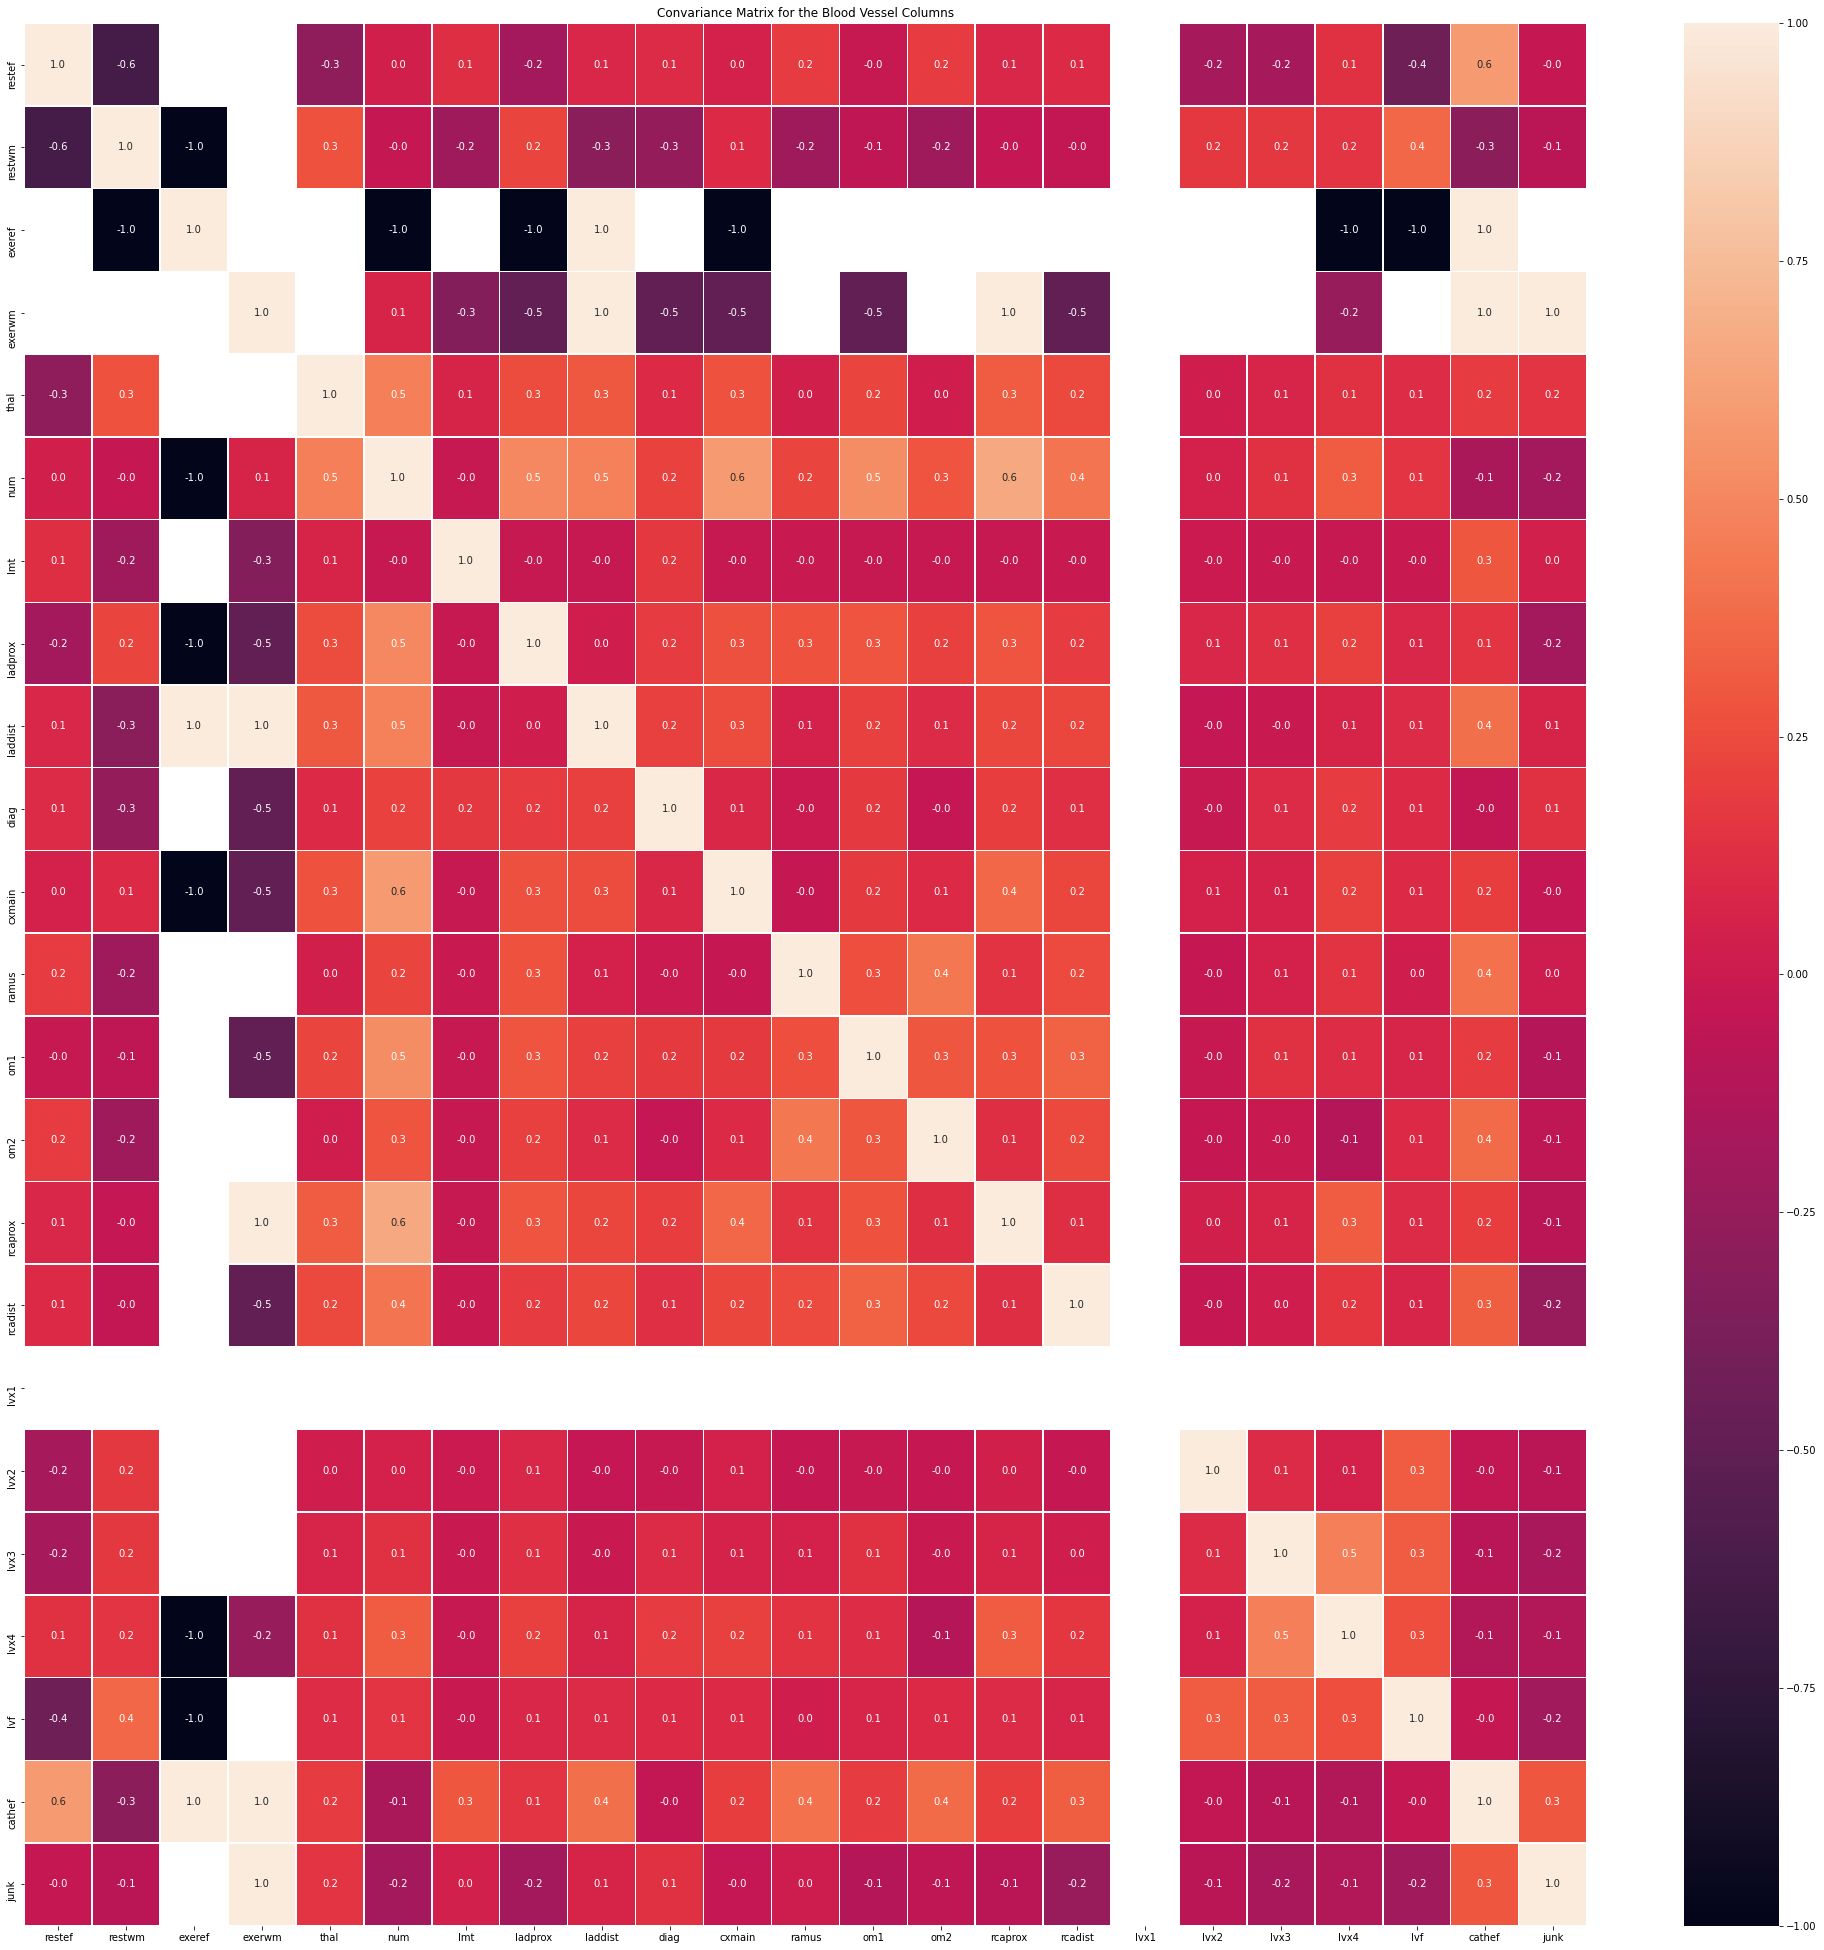

In [ ]:
f,ax = plt.subplots(figsize=(35, 35))
sns.heatmap(heart_part3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Convariance Matrix for the Blood Vessel Columns")
plt.show()

From the matrix we could see that removing these columns will not have much effect on the target variable. so we can go head and drop the columns

In [ ]:
heart_data = heart_data[heart_data.columns[:43]]
heart_data

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,dig,prop,nitr,pro,diuretic,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restef,restwm,exeref,exerwm,thal,num
0,63,1,NaN,NaN,NaN,NaN,1,145.0,1.0,233.0,NaN,50.0,20.0,1.0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,10.5,6.0,13.0,150.0,60.0,190.0,90.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0.0,NaN,NaN,NaN,NaN,6.0,0
1,67,1,NaN,NaN,NaN,NaN,4,160.0,1.0,286.0,NaN,40.0,40.0,0.0,NaN,1.0,2.0,0.0,1.0,0.0,0.0,0.0,9.5,6.0,13.0,108.0,64.0,160.0,90.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,3.0,NaN,NaN,NaN,NaN,3.0,2
2,67,1,NaN,NaN,NaN,NaN,4,120.0,1.0,229.0,NaN,20.0,35.0,0.0,NaN,1.0,2.0,0.0,1.0,0.0,0.0,0.0,8.5,6.0,10.0,129.0,78.0,140.0,80.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,2.0,NaN,NaN,NaN,NaN,7.0,1
3,37,1,NaN,NaN,NaN,NaN,3,130.0,0.0,250.0,NaN,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,13.0,17.0,187.0,84.0,195.0,68.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0.0,NaN,NaN,NaN,NaN,3.0,0
4,41,0,NaN,NaN,NaN,NaN,2,130.0,1.0,204.0,NaN,0.0,0.0,0.0,NaN,1.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,9.0,172.0,71.0,160.0,74.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0.0,NaN,NaN,NaN,NaN,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,54,0,1.0,1.0,1.0,NaN,4,127.0,0.0,333.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.5,NaN,8.0,154.0,83.0,158.0,84.0,78.0,0.0,0.0,0.0,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,1
770,62,1,0.0,0.0,0.0,NaN,1,NaN,0.0,139.0,1.0,15.0,30.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,1.0,NaN,NaN,NaN,0
771,55,1,1.0,1.0,1.0,NaN,4,122.0,1.0,223.0,1.0,20.0,40.0,1.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.3,NaN,5.0,100.0,74.0,210.0,100.0,70.0,0.0,0.0,0.0,NaN,6.0,4.0,NaN,0.39,3.0,NaN,NaN,6.0,2
772,58,1,1.0,1.0,1.0,NaN,4,NaN,0.0,385.0,0.0,10.0,20.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#  Step 2. uncover underlying structure

To know more about how a target variable  is correlated and the distribution of values as per different risk levels , it's essential to visualize and infer the distribution.

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


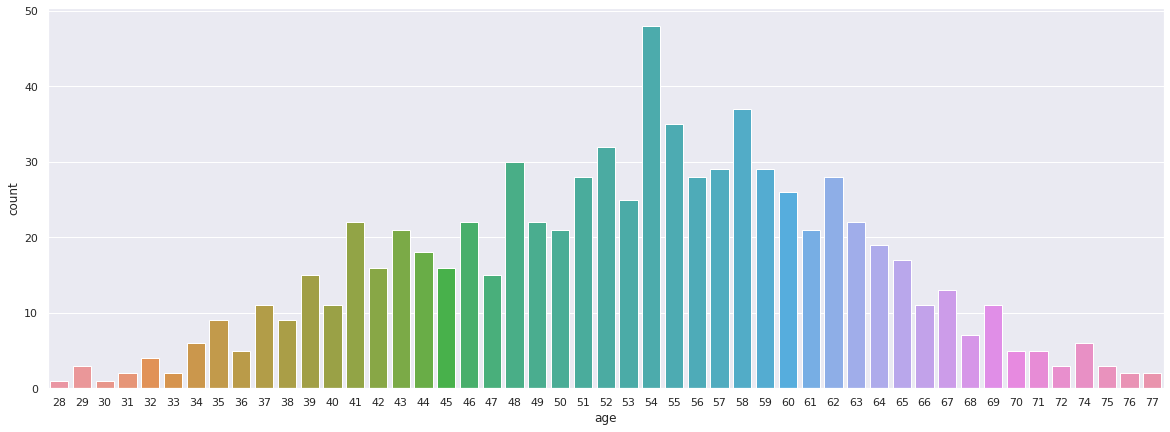

In [ ]:
plt.figure(figsize=(20,7))
sns.set()
sns.countplot(heart_data.age);

Age distribution is from age 28 to 77. There are lot of patients in the age from 45 to 60 than 70+

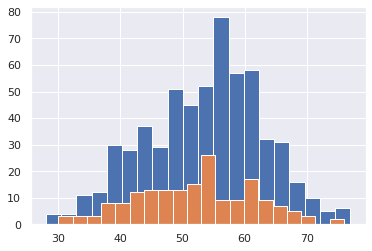

In [ ]:
heart_data[heart_data.sex==1].age.hist(bins=20);
heart_data[heart_data.sex==0].age.hist(bins=20);

Male/Female patient’s age  distribution is similar over all ages. But Female count seems very less compared to Male.

In [ ]:
heart_data.rename(columns={'num':'risk_level'}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


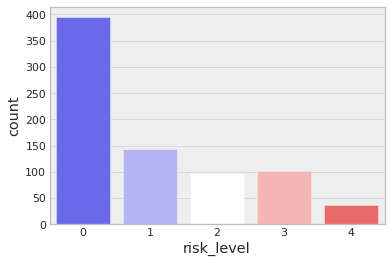

In [ ]:
plt.style.use('bmh')
sns.countplot(x="risk_level", data=heart_data, palette="bwr")
plt.show()

Above chart shows the risk_level wise division of patients in the given data set. In our data set more low risk-1 patients than high risk-4

In [ ]:
countNoDisease = len(heart_data[heart_data.risk_level == 0])
countHaveDisease = len(heart_data[heart_data.risk_level != 0] )
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_data.risk_level))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_data.risk_level))*100)))

Percentage of Patients Haven't Heart Disease: 51.03%
Percentage of Patients Have Heart Disease: 48.97%


In [ ]:
no_risk = heart_data[(heart_data['risk_level'] ==0) ].count()[1]
less_risk = heart_data[(heart_data['risk_level'] ==1) ].count()[1]
medium_risk = heart_data[(heart_data['risk_level'] ==2) ].count()[1]
acute_risk = heart_data[(heart_data['risk_level'] ==3) ].count()[1]
danger_risk = heart_data[(heart_data['risk_level'] ==4) ].count()[1]

print ("num of pepole without heart disease: "+ str(no_risk))
print ("num of pepole with less chance for heart disease: "+ str(less_risk))
print ("num of pepole with medium chance for heart disease: "+ str(medium_risk))
print ("num of pepole with severe chance for heart disease: "+ str(acute_risk))
print ("num of pepole with very severe chance for heart disease: "+ str(danger_risk))


num of pepole without heart disease: 395
num of pepole with less chance for heart disease: 143
num of pepole with medium chance for heart disease: 97
num of pepole with severe chance for heart disease: 102
num of pepole with very severe chance for heart disease: 37


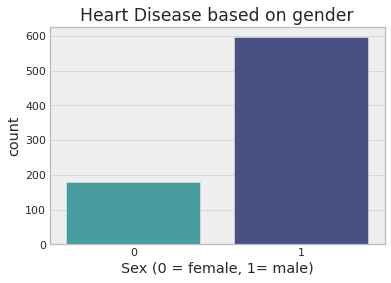

In [ ]:
sns.countplot(x='sex', data=heart_data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.title('Heart Disease based on gender')
plt.show()

From the above chart we could see that in the total number of patients in the date set male ratio is higher than female.

In [ ]:
countFemale = len(heart_data[heart_data.sex == 0])
countMale = len(heart_data[heart_data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart_data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart_data.sex))*100)))

Percentage of Female Patients: 23.00%
Percentage of Male Patients: 77.00%


In [ ]:
heart_data.groupby('risk_level').mean()

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,dig,prop,nitr,pro,diuretic,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restef,restwm,exeref,exerwm,thal
risk_level,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,50.529114,0.637975,0.903361,0.285714,0.421941,NaN,2.769620,130.064000,0.435115,232.720745,0.400000,16.901478,16.118812,0.113402,0.909091,0.565217,0.554430,0.040107,0.168449,0.152406,0.082888,0.078591,9.858824,5.237500,7.836096,148.653333,79.109333,174.632000,87.533333,83.666667,0.144000,0.005348,0.420321,1.482759,13.760369,58.347594,0.331250,0.508182,0.916667,NaN,0.0,3.923077
1,53.965035,0.902098,0.924731,0.774194,0.847826,NaN,3.552448,131.161538,0.542254,220.673759,0.454545,20.371429,18.557692,0.208633,1.000000,0.557692,0.720280,0.038462,0.476923,0.346154,0.161538,0.079365,8.849615,6.564865,7.763077,136.753846,73.830769,172.370079,86.606299,82.507692,0.538462,0.015385,1.006977,1.794118,14.935065,59.110236,0.764706,0.560000,1.222222,NaN,NaN,5.694444
2,56.876289,0.927835,0.969697,0.818182,0.878788,NaN,3.721649,135.426966,0.583333,224.163043,0.560976,19.536232,21.058824,0.255319,0.933333,0.608696,0.639175,0.034483,0.344828,0.318182,0.181818,0.151163,7.811111,6.772549,6.786667,127.355556,72.633333,169.088889,88.522222,84.617978,0.677778,0.066667,1.413333,2.056338,15.290909,55.779070,1.193548,0.553333,1.000000,0.6,1.0,5.954545
3,57.666667,0.911765,0.928571,0.714286,0.826087,NaN,3.558824,136.741573,0.539216,237.818182,0.536585,20.542857,22.071429,0.267327,1.000000,0.534247,0.762376,0.022727,0.252874,0.409091,0.181818,0.164706,6.959444,5.196721,6.326667,125.733333,72.688889,167.454545,86.704545,84.460674,0.711111,0.044444,1.722222,2.000000,13.839286,57.125000,1.468750,0.476667,1.500000,0.5,0.0,6.162162
4,56.675676,0.864865,0.960000,0.800000,0.916667,NaN,3.729730,143.588235,0.540541,260.777778,0.777778,26.100000,26.250000,0.162162,1.000000,0.523810,0.945946,0.062500,0.250000,0.312500,0.125000,0.062500,5.751429,4.722222,5.157143,127.571429,76.911765,172.647059,90.029412,86.176471,0.742857,0.028571,2.280000,2.166667,17.714286,50.000000,1.583333,0.590000,0.000000,NaN,0.0,6.285714


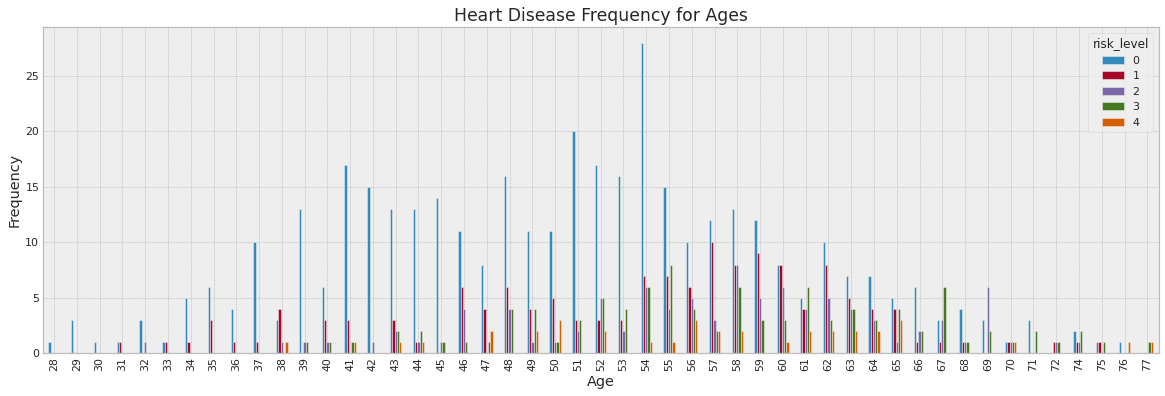

In [ ]:
pd.crosstab(heart_data.age,heart_data.risk_level).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

Above distribution shows that severity of disease age wise. From the chart we could see that for age lesser than 45 has low or medium severity risks assocaited wih it. At the same time for the age above 50 to 65 patients have all the risk level and for the ages above 65  risk levels are high.

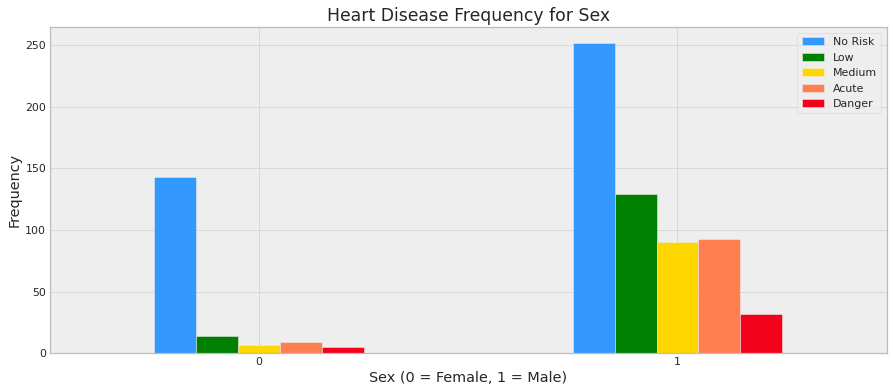

In [ ]:
pd.crosstab(heart_data.sex,heart_data.risk_level).plot(kind="bar",figsize=(15,6),color=['#3399ff','#008000','#ffd700','#ff7f50','#f3031b' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Risk","Low","Medium","Acute","Danger"])
plt.ylabel('Frequency')
plt.show()

Chart shows gender wise distribution of disease with risk-level. As we already know the number of male patients is higher, this shows how gender attribute has significant influence in the heart disease and the risk levels. Male has higher number of medium and acute risk level heart disease than the female.

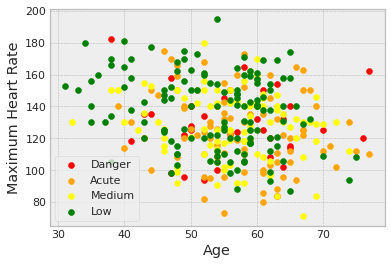

In [ ]:
plt.scatter(x=heart_data.age[heart_data.risk_level==4], y=heart_data.thalach[(heart_data.risk_level==4)], c="red")
plt.scatter(x=heart_data.age[heart_data.risk_level==3], y=heart_data.thalach[(heart_data.risk_level==3)], c="orange")
plt.scatter(x=heart_data.age[heart_data.risk_level==2], y=heart_data.thalach[(heart_data.risk_level==2)], c="yellow")
plt.scatter(x=heart_data.age[heart_data.risk_level==1], y=heart_data.thalach[(heart_data.risk_level==1)], c="green")
plt.legend(["Danger", "Acute","Medium","Low"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Above scatter distribution shows that we can see that risk_level based on heart date is getting severe when the age is high.

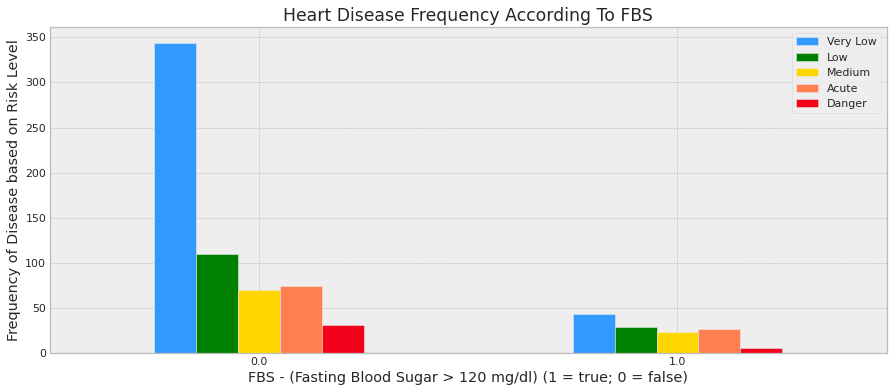

In [ ]:
pd.crosstab(heart_data.fbs,heart_data.risk_level).plot(kind="bar",figsize=(15,6),color=['#3399ff','#008000','#ffd700','#ff7f50','#f3031b' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Very Low", "Low","Medium","Acute","Danger"])
plt.ylabel('Frequency of Disease based on Risk Level')
plt.show()

Above chart based on fasting blood sugar with risk level. Frequency of occurences increase when sugar is above 120mg/dl.

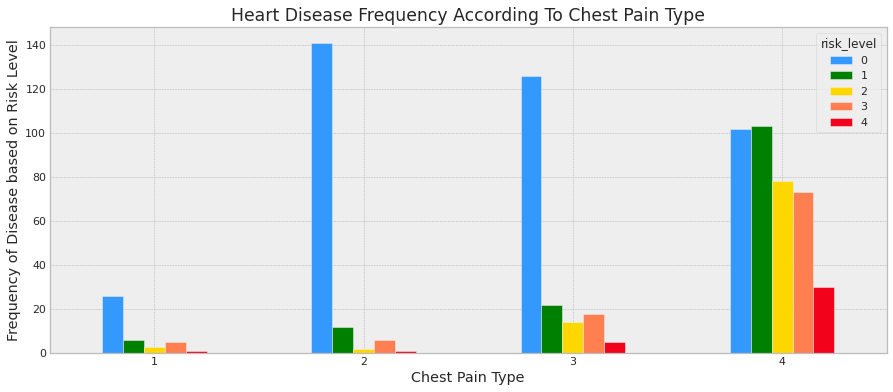

In [ ]:
pd.crosstab(heart_data.cp,heart_data.risk_level).plot(kind="bar",figsize=(15,6),color=['#3399ff','#008000','#ffd700','#ff7f50','#f3031b' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease based on Risk Level')
plt.show()

Above chart shows chest pain type and associated frequency with risk level. Interstingly we could see people who have very low or no risk of heeat disease also has all types of chest pain type. 

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


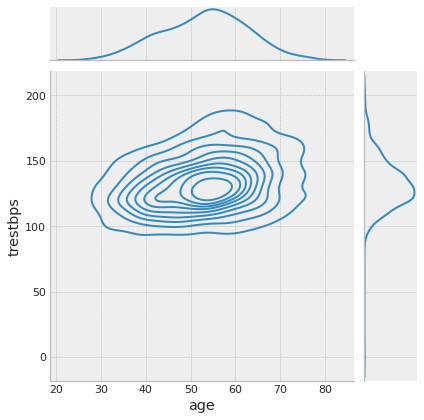

In [ ]:
sns.jointplot(heart_data.age, heart_data.trestbps, kind='kde');

 Above graphic to check how  age and  blood pressure correlate to each other (trestbps). Its logical pressure more correlated to age range. Its clear from the chart than from the corrplot.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


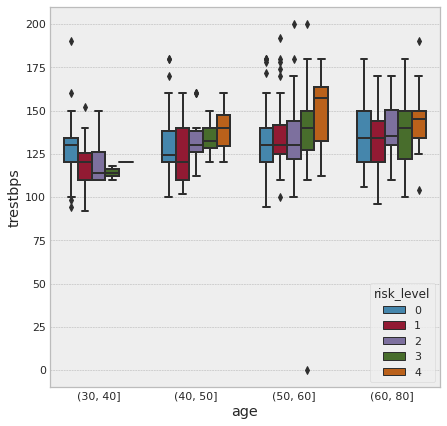

In [ ]:
categ = pd.cut(heart_data.age,[30,40,50,60,80])
dat_new = heart_data[['risk_level','trestbps']]
dat_new['age'] = categ
plt.figure(figsize=(7,7))
sns.boxplot(x='age',y='trestbps',hue='risk_level',data=dat_new, width=0.7);

In the above we have divide age interval in to 4 from 30-40,, 40-50, 50-60 and 60 and above. We could see there is increase blood presseure when age increase. But its also worth noting that all of the age groups has all the risk level disease mostly, which states that there is no direct correlation between blood pressure to the target variable risk_level.

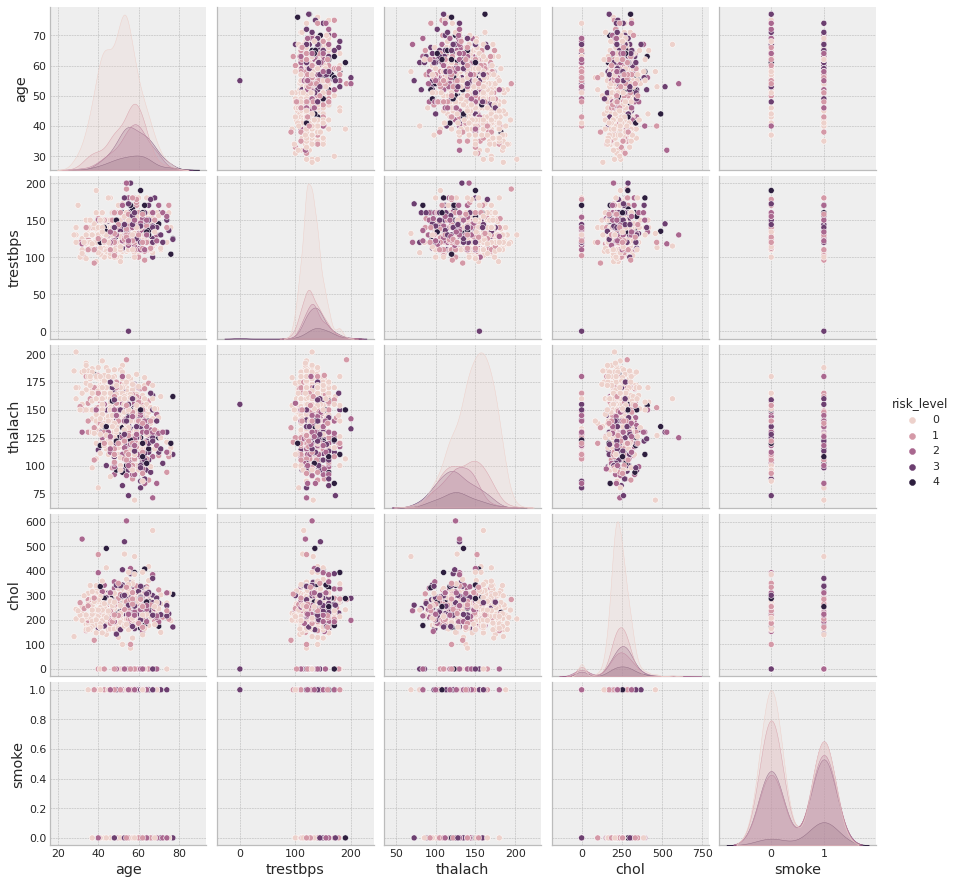

In [ ]:
sns.pairplot(heart_data[['age','trestbps','thalach','chol','smoke','risk_level']],hue='risk_level',height=2.5);

In the above corrplot, we cannot see  any high/abnormal correlation with target variable. But these attrtibutes seems equally important to predict the target.

# Step 3. extract important variables

From the previous steps with the help visuals we could understand the correlation between differnt variables to the target variable. We also masked and dropped variables which are not useful and strongly correlated to the target. In addition, we should select best features to predict the target. This will be addressed when the model is trained by using PCA or selecting K best features using SKLearn.


# Step 4. detect outliers and anomalies


printing out how many distinct values occur in each of the columns

In [ ]:
for column in heart_data.columns[:10]:
    print(column,' ',len(np.unique(heart_data[column].dropna())))

age   49
sex   2
painloc   2
painexer   2
relrest   2
pncaden   0
cp   4
trestbps   57
htn   2
chol   213


Some columns such as pncaden contain less than 2 values. These columns are not predictive and hence should be dropped.

In [ ]:
for column in heart_data.columns:
    if len(np.unique(heart_data[column].dropna()))<2:
        del heart_data[column]
print(heart_data.shape)

(774, 42)


There are few columns which have NaN values. It needs to be imputed before moving further. 

**Most Common Imputation Strategies**

**i. Do Nothing**

Some cases we can just ignore these anomalies and let the algorithm handle it by itself. But not all algorithms are immune to it, so it's better to use some strategy to handle the missing values.

**ii. Dropping Columns**

When there are missing values over 50%, it is prudent to drop the columns from the feature vector. It's advantageous only when there are a lot of NaNs used in other situations could lead to severe data loss.

**iii. Imputation using Mean/Median Values**

In this strategy, missing values are handled by filling it with the mean/median of non-missing values. It can only be used with numeric data and also it will not be effective as there are a lot of missing values in the column.

**iv. Imputation using Most Frequent or Zero/Constant Values**

This strategy is more suitable for categorical features (strings or numerical representations), in this strategy missing replaced by the most frequent value within each column. But we should be cautious using this strategy, when there is ample amount of missing values and this strategy could introduce bias in the dataset. 

**v. Imputation Using KNN**

In this strategy missing values are filled using the similar item/user in the dataset. Using similarity algorithms, we can find the N similar users and get the value of avg of them. It will be effective if there is a minimal number of missing values.


For our dataset below columns have almost 50% NaNs, so it's better to use strategy number 2 to drop the respective columns.


In [ ]:
for feature in heart_data.columns:
    #if the column is mostly empty na values, drop it
    if heart_data[feature].dropna().size<heart_data[feature].size/2:
        del heart_data[feature]
heart_data

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,cigs,years,fbs,famhist,restecg,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,risk_level
0,63,1,NaN,NaN,NaN,1,145.0,1.0,233.0,50.0,20.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,10.5,13.0,150.0,60.0,190.0,90.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0
1,67,1,NaN,NaN,NaN,4,160.0,1.0,286.0,40.0,40.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,9.5,13.0,108.0,64.0,160.0,90.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,2
2,67,1,NaN,NaN,NaN,4,120.0,1.0,229.0,20.0,35.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,8.5,10.0,129.0,78.0,140.0,80.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,1
3,37,1,NaN,NaN,NaN,3,130.0,0.0,250.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,17.0,187.0,84.0,195.0,68.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0
4,41,0,NaN,NaN,NaN,2,130.0,1.0,204.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,172.0,71.0,160.0,74.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,54,0,1.0,1.0,1.0,4,127.0,0.0,333.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.5,8.0,154.0,83.0,158.0,84.0,78.0,0.0,0.0,0.0,NaN,20.0,20.0,1
770,62,1,0.0,0.0,0.0,1,NaN,0.0,139.0,15.0,30.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
771,55,1,1.0,1.0,1.0,4,122.0,1.0,223.0,20.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.3,5.0,100.0,74.0,210.0,100.0,70.0,0.0,0.0,0.0,NaN,6.0,4.0,2
772,58,1,1.0,1.0,1.0,4,NaN,0.0,385.0,10.0,20.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
heart_data
Age_groups = []

for row in heart_data['age']:
    if row <= 1:
        Age_groups.append('Infants')
    elif row <= 11:
        Age_groups.append('Children')
    elif row <= 18:
        Age_groups.append('Teens')
    elif row <= 65:
        Age_groups.append('Adults')
    else:
        Age_groups.append('Elderly')
        
heart_data['Age_groups'] = Age_groups
heart_data



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,cigs,years,fbs,famhist,restecg,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,risk_level,Age_groups
0,63,1,NaN,NaN,NaN,1,145.0,1.0,233.0,50.0,20.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,10.5,13.0,150.0,60.0,190.0,90.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0,Adults
1,67,1,NaN,NaN,NaN,4,160.0,1.0,286.0,40.0,40.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,9.5,13.0,108.0,64.0,160.0,90.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,2,Elderly
2,67,1,NaN,NaN,NaN,4,120.0,1.0,229.0,20.0,35.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,8.5,10.0,129.0,78.0,140.0,80.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,1,Elderly
3,37,1,NaN,NaN,NaN,3,130.0,0.0,250.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,17.0,187.0,84.0,195.0,68.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0,Adults
4,41,0,NaN,NaN,NaN,2,130.0,1.0,204.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,172.0,71.0,160.0,74.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,54,0,1.0,1.0,1.0,4,127.0,0.0,333.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.5,8.0,154.0,83.0,158.0,84.0,78.0,0.0,0.0,0.0,NaN,20.0,20.0,1,Adults
770,62,1,0.0,0.0,0.0,1,NaN,0.0,139.0,15.0,30.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Adults
771,55,1,1.0,1.0,1.0,4,122.0,1.0,223.0,20.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.3,5.0,100.0,74.0,210.0,100.0,70.0,0.0,0.0,0.0,NaN,6.0,4.0,2,Adults
772,58,1,1.0,1.0,1.0,4,NaN,0.0,385.0,10.0,20.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Adults


In [ ]:
Adults = heart_data[(heart_data['Age_groups'] == 'Adults') ].count()[1]
Elderly = heart_data[(heart_data['Age_groups'] == 'Elderly') ].count()[1]
print ("num of adults : "+ str(Adults))
print ("num of elderly people: "+ str(Elderly))

num of adults : 706
num of elderly people: 68


In [ ]:
for column in heart_data.columns:
    if len(np.unique(heart_data[column].dropna().values))<10:
        print('{}: {}'.format(column,np.unique(heart_data[column].dropna().values)))


sex: [0 1]
painloc: [0. 1.]
painexer: [0. 1.]
relrest: [0. 1.]
cp: [1 2 3 4]
htn: [0. 1.]
fbs: [0. 1.]
famhist: [0. 1.]
restecg: [0. 1. 2.]
dig: [0. 1.]
prop: [ 0.  1. 22.]
nitr: [0. 1.]
pro: [0. 1.]
diuretic: [0. 1.]
exang: [0. 1.]
xhypo: [0. 1.]
slope: [0. 1. 2. 3.]
risk_level: [0 1 2 3 4]
Age_groups: ['Adults' 'Elderly']


Feature for Chest Pain called cp and Resting Electrocardiographic Results called restecg is categorical column with 4 class for cp and 3 class for rest ecg. It will be better if we encode this into numerical to use it in the model efficiently.

**Most Common Encoding Technique for Categorical Features:**

**i. One Hot Encoding**

In this type of encoding, we map each class of categorical value to a vector of 1 and 0 denoting the presence of a feature. The number of vectors is equal to the number of  ses of a categorical variable. It is not significant when used for a categorical variable which has more classes, since it introduces a lot of 0’s in the dataset.

**ii. Label Encoding**

In this encoding each category is labelled from 1 through N. It’s suitable when we have large N values.

**iii. Frequency Encoding**

	In this encoding technique, frequency of categories with respect to target variable is used
	to encode. It helps the model to understand and assign the weight in direct or inverse 
	proportion based on the nature of the data.
	
**iv. Mean Encoding**

	This Encoding is similar to Label Encoding but it's directly related to the target variable.  
	For example, mean target encoding for each category in the feature label is decided with 
	the mean value of the target variable on a training data. The advantages of the mean 
	target encoding are that it does not affect the volume of the data and helps in faster 
	learning.
	
	For our scenario in the dataset, we have only very few classes so its prudent to use simple 	one hot encoding like below.





In [ ]:
heart_data = heart_data[(heart_data['prop']!=22.0)]
heart_data = pd.get_dummies(heart_data, columns=['cp','restecg'])
heart_data

from google.colab import files
heart_data.to_csv('filename.csv') 
files.download('filename.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
del heart_data['Age_groups']


In [ ]:
heart_data.head()

,age,sex,painloc,painexer,relrest,trestbps,htn,chol,cigs,years,fbs,famhist,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,risk_level,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,63,1,NaN,NaN,NaN,145.0,1.0,233.0,50.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10.5,13.0,150.0,60.0,190.0,90.0,85.0,0.0,0.0,2.3,3.0,NaN,172.0,0,1,0,0,0,0,0,1
1,67,1,NaN,NaN,NaN,160.0,1.0,286.0,40.0,40.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.5,13.0,108.0,64.0,160.0,90.0,90.0,1.0,0.0,1.5,2.0,NaN,185.0,2,0,0,0,1,0,0,1
2,67,1,NaN,NaN,NaN,120.0,1.0,229.0,20.0,35.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,8.5,10.0,129.0,78.0,140.0,80.0,80.0,1.0,0.0,2.6,2.0,NaN,150.0,1,0,0,0,1,0,0,1
3,37,1,NaN,NaN,NaN,130.0,0.0,250.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,17.0,187.0,84.0,195.0,68.0,78.0,0.0,0.0,3.5,3.0,NaN,167.0,0,0,0,1,0,1,0,0
4,41,0,NaN,NaN,NaN,130.0,1.0,204.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,172.0,71.0,160.0,74.0,86.0,0.0,0.0,1.4,1.0,NaN,40.0,0,0,1,0,0,0,0,1


In [ ]:
heart_data_imputed = heart_data.fillna(heart_data.mean());
heart_data_imputed

,age,sex,painloc,painexer,relrest,trestbps,htn,chol,cigs,years,fbs,famhist,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,risk_level,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,63,1,0.922607,0.535642,0.644764,145.000000,1.0,233.0,50.0,20.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000,13.000000,150.000000,60.000000,190.000000,90.000000,85.00000,0.000000,0.000000,2.3000,3.000000,14.362353,172.000000,0,1,0,0,0,0,0,1
1,67,1,0.922607,0.535642,0.644764,160.000000,1.0,286.0,40.0,40.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,9.500000,13.000000,108.000000,64.000000,160.000000,90.000000,90.00000,1.000000,0.000000,1.5000,2.000000,14.362353,185.000000,2,0,0,0,1,0,0,1
2,67,1,0.922607,0.535642,0.644764,120.000000,1.0,229.0,20.0,35.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,8.500000,10.000000,129.000000,78.000000,140.000000,80.000000,80.00000,1.000000,0.000000,2.6000,2.000000,14.362353,150.000000,1,0,0,0,1,0,0,1
3,37,1,0.922607,0.535642,0.644764,130.000000,0.0,250.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,13.000000,17.000000,187.000000,84.000000,195.000000,68.000000,78.00000,0.000000,0.000000,3.5000,3.000000,14.362353,167.000000,0,0,0,1,0,1,0,0
4,41,0,0.922607,0.535642,0.644764,130.000000,1.0,204.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,172.000000,71.000000,160.000000,74.000000,86.00000,0.000000,0.000000,1.4000,1.000000,14.362353,40.000000,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,54,0,1.000000,1.000000,1.000000,127.000000,0.0,333.0,0.0,0.0,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,7.500000,8.000000,154.000000,83.000000,158.000000,84.000000,78.00000,0.000000,0.000000,0.0000,1.758264,20.000000,20.000000,1,0,0,0,1,0,1,0
770,62,1,0.000000,0.000000,0.000000,132.363128,0.0,139.0,15.0,30.0,0.0,0.0,0.038028,0.229901,0.246132,0.123769,0.096126,8.858357,7.371309,139.955494,76.423398,172.510519,87.495091,83.78352,0.381085,0.020891,0.9053,1.758264,14.362353,57.670904,0,1,0,0,0,0,1,0
771,55,1,1.000000,1.000000,1.000000,122.000000,1.0,223.0,20.0,40.0,1.0,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,5.300000,5.000000,100.000000,74.000000,210.000000,100.000000,70.00000,0.000000,0.000000,0.0000,1.758264,6.000000,4.000000,2,0,0,0,1,0,1,0
772,58,1,1.000000,1.000000,1.000000,132.363128,0.0,385.0,10.0,20.0,1.0,1.0,0.038028,0.229901,0.246132,0.123769,0.096126,8.858357,7.371309,139.955494,76.423398,172.510519,87.495091,83.78352,0.381085,0.020891,0.9053,1.758264,14.362353,57.670904,0,0,0,0,1,0,0,1


In [ ]:
heart_data_imputed

,age,sex,painloc,painexer,relrest,trestbps,htn,chol,cigs,years,fbs,famhist,dig,prop,nitr,pro,diuretic,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,risk_level,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,63,1,0.922607,0.535642,0.644764,145.000000,1.0,233.0,50.0,20.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000,13.000000,150.000000,60.000000,190.000000,90.000000,85.00000,0.000000,0.000000,2.3000,3.000000,14.362353,172.000000,0,1,0,0,0,0,0,1
1,67,1,0.922607,0.535642,0.644764,160.000000,1.0,286.0,40.0,40.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,9.500000,13.000000,108.000000,64.000000,160.000000,90.000000,90.00000,1.000000,0.000000,1.5000,2.000000,14.362353,185.000000,2,0,0,0,1,0,0,1
2,67,1,0.922607,0.535642,0.644764,120.000000,1.0,229.0,20.0,35.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,8.500000,10.000000,129.000000,78.000000,140.000000,80.000000,80.00000,1.000000,0.000000,2.6000,2.000000,14.362353,150.000000,1,0,0,0,1,0,0,1
3,37,1,0.922607,0.535642,0.644764,130.000000,0.0,250.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,13.000000,17.000000,187.000000,84.000000,195.000000,68.000000,78.00000,0.000000,0.000000,3.5000,3.000000,14.362353,167.000000,0,0,0,1,0,1,0,0
4,41,0,0.922607,0.535642,0.644764,130.000000,1.0,204.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,172.000000,71.000000,160.000000,74.000000,86.00000,0.000000,0.000000,1.4000,1.000000,14.362353,40.000000,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,54,0,1.000000,1.000000,1.000000,127.000000,0.0,333.0,0.0,0.0,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,7.500000,8.000000,154.000000,83.000000,158.000000,84.000000,78.00000,0.000000,0.000000,0.0000,1.758264,20.000000,20.000000,1,0,0,0,1,0,1,0
770,62,1,0.000000,0.000000,0.000000,132.363128,0.0,139.0,15.0,30.0,0.0,0.0,0.038028,0.229901,0.246132,0.123769,0.096126,8.858357,7.371309,139.955494,76.423398,172.510519,87.495091,83.78352,0.381085,0.020891,0.9053,1.758264,14.362353,57.670904,0,1,0,0,0,0,1,0
771,55,1,1.000000,1.000000,1.000000,122.000000,1.0,223.0,20.0,40.0,1.0,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,5.300000,5.000000,100.000000,74.000000,210.000000,100.000000,70.00000,0.000000,0.000000,0.0000,1.758264,6.000000,4.000000,2,0,0,0,1,0,1,0
772,58,1,1.000000,1.000000,1.000000,132.363128,0.0,385.0,10.0,20.0,1.0,1.0,0.038028,0.229901,0.246132,0.123769,0.096126,8.858357,7.371309,139.955494,76.423398,172.510519,87.495091,83.78352,0.381085,0.020891,0.9053,1.758264,14.362353,57.670904,0,0,0,0,1,0,0,1


##Test Train Data Split:
 
We usually split our data into test and training data sets and we fit our model with training data and make predictions on test data.
 
Choosing the train/test splitting strategy:
Since we do not have large amount of data, we can use the train_test_split from  sklearn.model_selection , we split the data into training set(70%) and testing set(30%). 
 As we are not sure if data can capture most of the input space, we can perform k-fold cross validation for testing the model accuracy.
 


In [ ]:
from sklearn.model_selection import train_test_split

X = heart_data_imputed[heart_data_imputed.columns.difference(['risk_level'])]
y = heart_data_imputed['risk_level']
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
y_train


337    1
568    0
34     0
688    1
630    2
      ..
763    0
192    1
629    2
559    2
684    3
Name: risk_level, Length: 541, dtype: int64

#Feature Engineering


Feature Engineering can be used as a process to transform the existing data attributes into feature vectors that can better represent the underlying problem to predictive models, which will result in the improvement of accuracy on unseen data.



#### A) Principal Component Analysis

Principal component analysis is a dimensionality technique which combines similar (correlated) attributes and creates new ones that are superior to original attributes.



In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train], axis = 1)



Plotting the distribution of data using two Principal Components .By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space.but because we’ve transformed our data in these different directions, we’ve made sure to keep all original variables in our model.
 
After performing dimensionality reduction, the alignment of target variable risk_index with respect to principal components looked like:


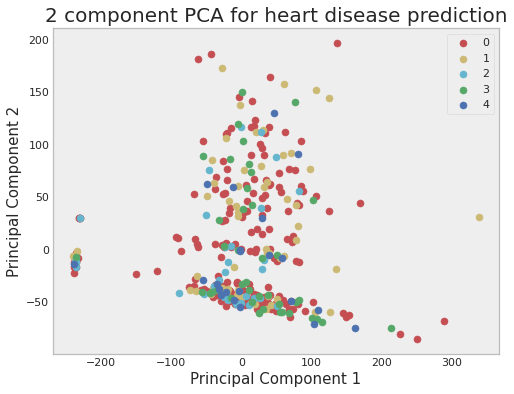

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for heart disease prediction', fontsize = 20)

targets = [0,1,2,3,4]
colors = ['r','y','c','g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['risk_level'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = DecisionTreeClassifier()
logisticRegression = LogisticRegression(C=100)
classifier.fit(principalComponents, y_train)
logisticRegression.fit(principalComponents, y_train)
new_data = pca.fit_transform(X_test)
pred_labels = classifier.predict(new_data)
pred_labels_logistic = logisticRegression.predict(new_data)
print ("Accuracy for decision tree classifier with PCA is:  ", metrics.accuracy_score(y_test, pred_labels ))
print ("Accuracy for Logistic Regression classifier with PCA is:  ",  metrics.accuracy_score(y_test, pred_labels_logistic ))

Accuracy for decision tree classifier with PCA is:   0.2801724137931034
Accuracy for Logistic Regression classifier with PCA is:   0.5


Accuracy of the model when PCA is applied is observed to be very less(50%) , so K best parameters can be used for feature extraction.


# Feature Extraction

Although there are some features which are slightly predictive by themselves, the data contains more features than necessary, and not all of these features are useful. To narrow down the number of features, I will use the sklearn class SelectKBest. By default, this class uses the anova f-value of each feature to select the best features. The f value is a ratio of the variance between classes divided by the variance within classes. This tells us how much the variable differs between the classes. The higher the f value, the more likely a variable is to be relevant. However, the f value can miss features or relationships which are meaningful. Another way to approach the feature selection is to select the features with the highest mutual information. I will use both of these methods to find which one yields the best results.


# Model Implementation 

Model Training :


After the K best features are computed, we then train the data with Logistic Regression and Random Forest Classifier . After the model is trained, the cross validated accuracy is computed with varying number of features . 

## Cross Validation accuracy for Logistic Regression:


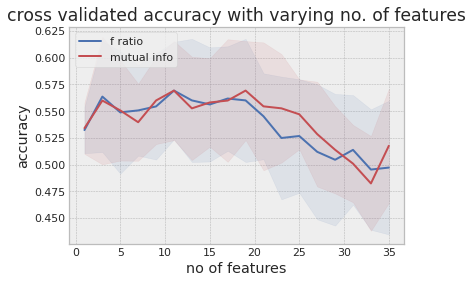

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif


results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
for i in range(1,37,2):
    pipe = Pipeline([
               ('select_feat',SelectKBest(k=i)),
                ('clf',LogisticRegression(C=100))])
    cv_scores = cross_val_score(pipe,X_train,y_train,cv=10,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([
               ('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',LogisticRegression(C=100))])
    cv_scores = cross_val_score(pipe,X_train,y_train,cv=10,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())
    
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,37,2),results_f,c='b',label='f ratio')
plt.fill_between(range(1,37,2),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,37,2),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,37,2),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with varying no. of features')
plt.show()



From the above graph, we can infer that the accuracy is better with 10 and 20 features having good f-value and mutual info.


## Cross Validation accuracy for Random Forest Classifier:

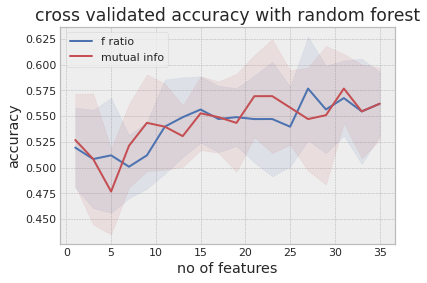

In [ ]:
from sklearn.ensemble import RandomForestClassifier
results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
for i in range(1,37,2):
    pipe = Pipeline([
               ('select_feat',SelectKBest(k=i)),
                ('clf',RandomForestClassifier())])
    cv_scores = cross_val_score(pipe,X_train,y_train,cv=10,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([
               ('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',RandomForestClassifier())])
    cv_scores = cross_val_score(pipe,X_train,y_train,cv=10,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())
    
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,37,2),results_f,c='b',label='f ratio')
plt.fill_between(range(1,37,2),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,37,2),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,37,2),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with random forest')
plt.show()

From the above graph, we can infer that the accuracy is better with 14 and 20 features having good f-value and mutual info.

After observing the graphs obtained, the number of features are passed to the model to obtain the optimal accuracy for both the algorithms. Random forest is assumed to be the best model for our problem.
 
 Let us implement the models to see how they work for our data set by selecting the feature range from the insights obtained in the above graphs.

####Model Evaluation using cross-validation:

This is a technique that splits the data into training and test datasets. The most commonly used cross-validation technique is K-fold cross-validation where the original data set is split into k subsamples of equal size. Then in the first iteration first fold is considered as a test set and this process is repeated k times considering kth fold as a test set and the rest of k-1 subsets are used as a training set. The overall accuracy is then computed to access the effectiveness of the model.

Here in this project we have used 5 fold cross validation to test the accuracy of the model and the
results are obtained as follows.



In [ ]:

pipe = Pipeline([
               ('select_feat',SelectKBest(k=10)),
                ('clf',RandomForestClassifier())])
params = {'select_feat__k':range(6,14,2),'clf__min_samples_leaf':[1,5,10,15,20,25,50]}
grid_search = GridSearchCV(pipe,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
rf_est = grid_search.best_estimator_
print('Random forest Classifier')
print(grid_search.best_params_)
print('accuracy: {:.3f}'.format(grid_search.best_score_))

Random forest Classifier
{'clf__min_samples_leaf': 20, 'select_feat__k': 6}
accuracy: 0.571


load JS visualization code of SHAP to this notebook


In [ ]:
shap.initjs()

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

Explain the model predictions using SHAP


In [ ]:

explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train)
X_train

,age,chol,cigs,cp_1,cp_2,cp_3,cp_4,dig,diuretic,exang,famhist,fbs,htn,met,nitr,oldpeak,painexer,painloc,pro,prop,relrest,restecg_0.0,restecg_1.0,restecg_2.0,rldv5,rldv5e,sex,slope,thalach,thaldur,thalrest,tpeakbpd,tpeakbps,trestbpd,trestbps,xhypo,years
337,31,270.000000,19.008584,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.000000,0.0,6.000000,0.000000,1.5000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,20.000000,15.000000,1,2.000000,153.000000,14.000000,84.000000,90.000000,170.000000,90.00000,120.000000,0.000000,18.721382
568,59,231.497981,19.008584,0,0,0,1,0.000000,0.000000,0.000000,0.562368,0.000000,0.0,5.000000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,4.000000,6.000000,1,1.758264,140.000000,10.000000,78.000000,110.000000,220.000000,90.00000,140.000000,0.000000,18.721382
34,44,233.000000,20.000000,0,0,1,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,15.000000,0.000000,0.4000,0.535642,0.922607,0.000000,1.000000,0.644764,1,0,0,14.362353,105.000000,1,1.000000,179.000000,13.000000,70.000000,78.000000,190.000000,85.00000,130.000000,0.000000,19.000000
688,50,218.000000,20.000000,0,0,0,1,0.038028,0.096126,0.381085,1.000000,0.000000,0.0,7.371309,0.246132,0.9053,1.000000,1.000000,0.123769,0.229901,1.000000,1,0,0,14.362353,57.670904,1,1.758264,139.955494,8.858357,76.423398,87.495091,172.510519,83.78352,132.363128,0.020891,3.000000
630,53,0.000000,20.000000,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.171504,0.0,8.000000,0.000000,1.5000,1.000000,1.000000,1.000000,0.000000,1.000000,0,1,0,8.000000,8.000000,1,2.000000,140.000000,8.000000,65.000000,84.000000,130.000000,80.00000,154.000000,1.000000,18.721382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,68,254.000000,20.000000,0,0,1,0,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,10.000000,1.000000,0.0000,0.000000,1.000000,0.000000,1.000000,1.000000,1,0,0,9.000000,11.000000,1,1.758264,151.000000,9.000000,63.000000,110.000000,174.000000,80.00000,134.000000,0.000000,45.000000
192,43,247.000000,35.000000,0,0,0,1,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,5.000000,0.000000,0.1000,0.535642,0.922607,1.000000,1.000000,0.644764,0,0,1,14.362353,160.000000,1,2.000000,143.000000,4.000000,70.000000,80.000000,138.000000,88.00000,132.000000,0.000000,20.000000
629,68,0.000000,60.000000,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.000000,1.0,5.000000,1.000000,3.0000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,13.000000,13.000000,1,2.000000,130.000000,5.000000,70.000000,80.000000,130.000000,92.00000,138.000000,0.000000,10.000000
559,52,231.497981,19.008584,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.000000,0.0,6.000000,0.000000,1.5000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,17.000000,20.000000,1,2.000000,126.000000,10.000000,63.000000,95.000000,220.000000,85.00000,170.000000,0.000000,18.721382


In [ ]:
value = explainer.expected_value[0]
value

0.5167837338262475

In [ ]:
X_train

,age,chol,cigs,cp_1,cp_2,cp_3,cp_4,dig,diuretic,exang,famhist,fbs,htn,met,nitr,oldpeak,painexer,painloc,pro,prop,relrest,restecg_0.0,restecg_1.0,restecg_2.0,rldv5,rldv5e,sex,slope,thalach,thaldur,thalrest,tpeakbpd,tpeakbps,trestbpd,trestbps,xhypo,years
337,31,270.000000,19.008584,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.000000,0.0,6.000000,0.000000,1.5000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,20.000000,15.000000,1,2.000000,153.000000,14.000000,84.000000,90.000000,170.000000,90.00000,120.000000,0.000000,18.721382
568,59,231.497981,19.008584,0,0,0,1,0.000000,0.000000,0.000000,0.562368,0.000000,0.0,5.000000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,4.000000,6.000000,1,1.758264,140.000000,10.000000,78.000000,110.000000,220.000000,90.00000,140.000000,0.000000,18.721382
34,44,233.000000,20.000000,0,0,1,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,15.000000,0.000000,0.4000,0.535642,0.922607,0.000000,1.000000,0.644764,1,0,0,14.362353,105.000000,1,1.000000,179.000000,13.000000,70.000000,78.000000,190.000000,85.00000,130.000000,0.000000,19.000000
688,50,218.000000,20.000000,0,0,0,1,0.038028,0.096126,0.381085,1.000000,0.000000,0.0,7.371309,0.246132,0.9053,1.000000,1.000000,0.123769,0.229901,1.000000,1,0,0,14.362353,57.670904,1,1.758264,139.955494,8.858357,76.423398,87.495091,172.510519,83.78352,132.363128,0.020891,3.000000
630,53,0.000000,20.000000,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.171504,0.0,8.000000,0.000000,1.5000,1.000000,1.000000,1.000000,0.000000,1.000000,0,1,0,8.000000,8.000000,1,2.000000,140.000000,8.000000,65.000000,84.000000,130.000000,80.00000,154.000000,1.000000,18.721382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,68,254.000000,20.000000,0,0,1,0,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,10.000000,1.000000,0.0000,0.000000,1.000000,0.000000,1.000000,1.000000,1,0,0,9.000000,11.000000,1,1.758264,151.000000,9.000000,63.000000,110.000000,174.000000,80.00000,134.000000,0.000000,45.000000
192,43,247.000000,35.000000,0,0,0,1,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,5.000000,0.000000,0.1000,0.535642,0.922607,1.000000,1.000000,0.644764,0,0,1,14.362353,160.000000,1,2.000000,143.000000,4.000000,70.000000,80.000000,138.000000,88.00000,132.000000,0.000000,20.000000
629,68,0.000000,60.000000,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.000000,1.0,5.000000,1.000000,3.0000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,13.000000,13.000000,1,2.000000,130.000000,5.000000,70.000000,80.000000,130.000000,92.00000,138.000000,0.000000,10.000000
559,52,231.497981,19.008584,0,0,0,1,0.000000,0.000000,1.000000,0.562368,0.000000,0.0,6.000000,0.000000,1.5000,1.000000,1.000000,0.000000,0.000000,1.000000,1,0,0,17.000000,20.000000,1,2.000000,126.000000,10.000000,63.000000,95.000000,220.000000,85.00000,170.000000,0.000000,18.721382


In [ ]:
shap.initjs()
data_for_prediction = X_train.iloc[1]
shap.force_plot(explainer.expected_value[1], shap_values[1][1], data_for_prediction)


In [ ]:
The Goal of SHAP explainer is to interpret the prediction of any instance by computing the individual contribution of every feature to the prediction.
The above diagram describes how each feature is related and contributing to the model output from base value which is the average output of the entire dataset

Features pushing towards higher prediction are shown in red 
Features pushing towards lower prediction are shown in blue

In our scenario age, cp_2, tpeakbps, painexer , thaldur always push the prediction higher leading to high risk whereas other features like met, trestbps, oldpeak etc which are in blue push the prediction towards lower value

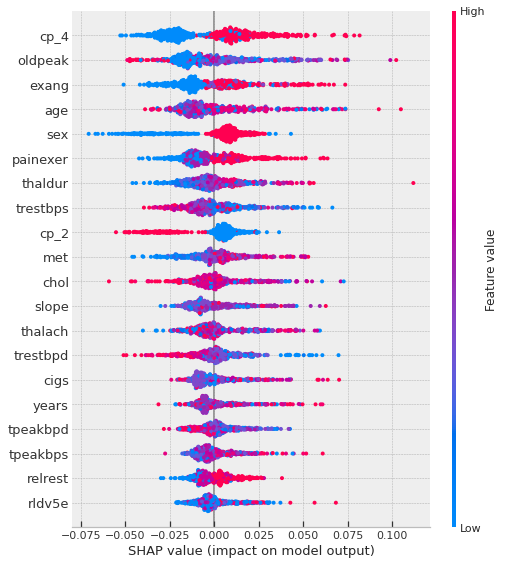

In [ ]:
shap.summary_plot(shap_values[1], X_train)

The summary plot above describe the feature importance with the feature effect. Y-axis describes the feature and the point on the x axis shows the SHAPely values. Features are sorted based on the importance. The color represents the value of feature from low to high. For example in the above diagram lower cp_4 means that it reduces the chances of high risk in the patient.

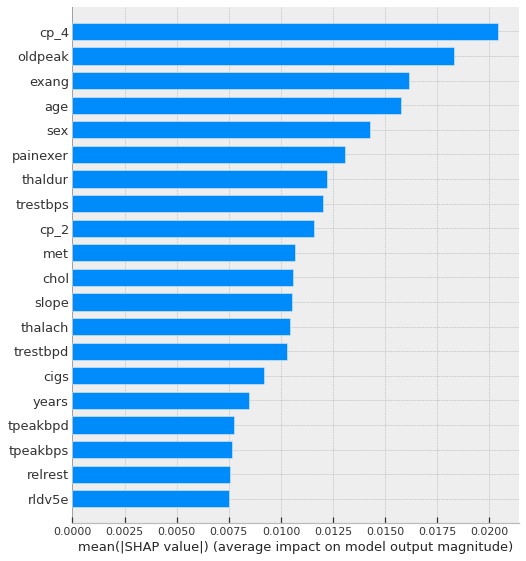

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type='bar')

The above diagram demonstrates the SHAP feature importance. Features which have large absolute SHapely values are very important.The figure above demonstrates SHAP tree feature importance for random forest model created to predict the risk status of a patient.

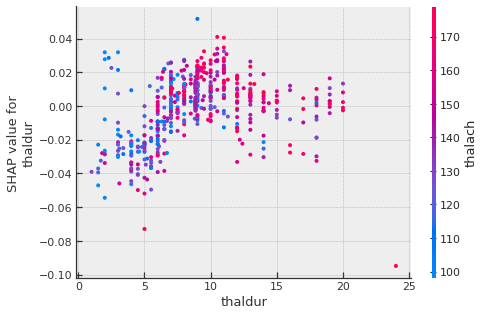

In [ ]:

shap.dependence_plot("thaldur", shap_values[0], X_train)


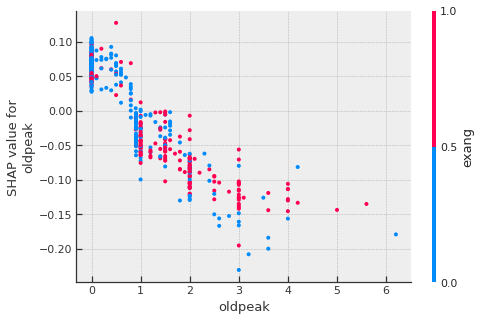

In [ ]:
shap.dependence_plot("oldpeak", shap_values[0], X_train)

In both of the above dependency plots with interaction visualization , we pick a feature and then for a given a data instance, we plot a feature value on X axis with the corresponding SHApely value and see how it interacts with the corresponding feature attribute, these are called shap interaction values.

This interaction effect is defined as additional combined feature after contributing to individual feature effects.

From the above graph, we can explain that for more value of oldpeak the value of exang decreases.




In [ ]:
y_prediction = grid_search.predict(X_test)


In [ ]:
from sklearn import metrics
print('Random forest Classifier Accuracy: ')
print( metrics.accuracy_score(y_test, y_prediction))

Random forest Classifier Accuracy: 
0.5560344827586207


In [ ]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
               ('select_feat',SelectKBest(k=10)),
                ('clf',LogisticRegression(C = 100))])
params = {'select_feat__k':range(10,20,2),'clf__C':[10**x for x in range(-3,5)]}
grid_search = GridSearchCV(pipe,param_grid=params,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
rf_est = grid_search.best_estimator_
print('Logistic Regression Classifier')
print(grid_search.best_params_)
print('accuracy: {:.3f}'.format(grid_search.best_score_))

Logistic Regression Classifier
{'clf__C': 10, 'select_feat__k': 12}
accuracy: 0.575


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
y_prediction = grid_search.predict(X_test)

In [ ]:
print('LogisticRegression accuracy: ')
print( metrics.accuracy_score(y_test, y_prediction))

LogisticRegression accuracy: 
0.5344827586206896


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.head()

,age,chol,cigs,cp_1,cp_2,cp_3,cp_4,dig,diuretic,exang,famhist,fbs,htn,met,nitr,oldpeak,painexer,painloc,pro,prop,relrest,restecg_0.0,restecg_1.0,restecg_2.0,rldv5,rldv5e,sex,slope,thalach,thaldur,thalrest,tpeakbpd,tpeakbps,trestbpd,trestbps,xhypo,years
369,43,291.0,19.008584,1,0,0,0,0.0,0.0,0.0,0.562368,0.0,0.0,7.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,1,0,17.000000,15.0,1,1.758264,155.0,13.0,80.0,120.0,230.0,80.0,120.0,0.0,18.721382
628,53,0.0,60.000000,0,0,0,1,0.0,1.0,0.0,1.000000,0.0,1.0,4.0,1.0,0.0,1.000000,1.000000,0.0,1.0,1.000000,1,0,0,20.000000,11.0,1,1.758264,106.0,4.0,66.0,90.0,145.0,88.0,126.0,0.0,7.000000
401,47,248.0,19.008584,0,0,1,0,0.0,0.0,0.0,0.562368,1.0,1.0,5.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.000000,1,0,0,8.000000,8.0,0,1.758264,170.0,7.0,110.0,100.0,200.0,100.0,135.0,0.0,18.721382
14,52,199.0,30.000000,0,0,1,0,0.0,0.0,0.0,0.000000,1.0,0.0,18.0,0.0,0.5,0.535642,0.922607,0.0,0.0,0.644764,1,0,0,14.362353,231.0,1,1.000000,162.0,12.5,91.0,96.0,220.0,100.0,172.0,0.0,35.000000
549,34,220.0,19.008584,0,1,0,0,0.0,0.0,0.0,0.562368,0.0,0.0,6.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,1,0,0,15.000000,15.0,1,1.758264,150.0,18.0,83.0,80.0,150.0,70.0,98.0,0.0,18.721382


In [ ]:
pr = grid_search.predict(X_test.head())

In [ ]:
pr

array([0, 0, 0, 0, 0])